<a href="https://colab.research.google.com/github/comandi1969/AIFFEL_Online_Quest/blob/main/ML_With_Python/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EC%B4%88_%EB%85%B8%EB%93%9C7_%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 라이브러리 불러오기
import pandas as pd


In [9]:
# 와인 데이터 불러오기
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [12]:
# 데이터 샘플 확인하기
data.shape
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [15]:
# 스탠다드 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data[:3]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818]])

In [18]:
# 데이터 복사, df 변수
df = data.copy()


In [19]:
# PCA 라이브러리 불러오기
from sklearn.decomposition import PCA

In [20]:
# PCA
pca = PCA(n_components=2)

In [27]:
# PCA 변환
df = pca.fit_transform(df)
type(df)

numpy.ndarray

In [30]:
# 데이터 크기 확인
df.shape


(178, 2)

In [29]:
# 샘플 데이터 확인
df[:3]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ]])

In [31]:
# PCA => 2차원 축소하면 시각화 가능
# 시각화 라이브러리
import matplotlib.pyplot as plt
type(df)

numpy.ndarray

In [33]:
# 데이터 프레임 변환
df = pd.DataFrame(df)
df.head()

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


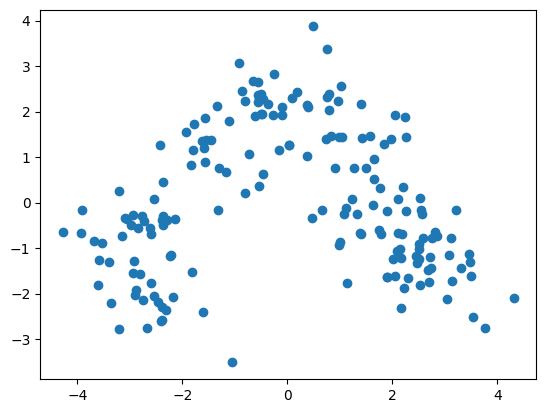

In [38]:
# scatter
plt.scatter(df.iloc[:, 0], df.iloc[:, 1]) # 컬럼명이 정수라 같은 결과 plt.scatter(df.loc[:, 0], df.loc[:, 1])

In [41]:
# 타켓 확인
dataset.target
dataset.target_names

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

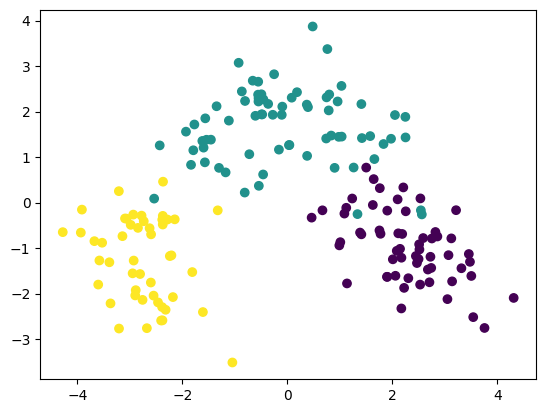

In [42]:
# scatter, c=target
# 비지도학습이기 때문에 특정 값이 아닌 각각의 색으로 군집된 타겟 군집을 출력
# 피처를 13 -> 2 축소
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dataset.target)

In [47]:
# 데이터 설명(%)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.36198848 0.1920749 ]
0.5540633835693531


In [53]:
# 지도 학습, PCA 전후 비교
# PCA 후 데이터로 머신러닝 (2개 피처, df)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2023)
cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5)
cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5).mean() # 대략 95% 정확도 제공



0.9492063492063492

In [55]:
# PCA 전 데이터로 머신러닝 (13개 피처, data)
cross_val_score(model, data, dataset.target, scoring='accuracy', cv=5).mean() # 대략 96% 정확도 제공

0.9609523809523811